1. Feature Selection based on F-Value -> Sorting Columns
2. Which Features optimize ROC with train_vali
3. Apply Feature List on Test Data 
4. Submit


In [2]:
import re
from pathlib import Path
import numpy as np
import pandas as pd

In [3]:
data_path_raw = Path.cwd().parent.parent / "data" / "raw"
data_path_preprocessed = Path.cwd().parent.parent / "data" / "processed"

In [4]:
raw_df_processed = pd.read_csv(data_path_preprocessed / "training_set_features_encoded_imputed_standardized.csv", index_col="respondent_id")
labels_df = pd.read_csv(data_path_raw / "training_set_labels.csv", index_col="respondent_id")
test_df_processed = pd.read_csv(data_path_preprocessed / "test_set_features_encoded_imputed_standardized.csv", index_col="respondent_id")

all_raw_df = raw_df_processed.join(labels_df)

In [5]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# feature extraction
SelectBest = SelectKBest(score_func=f_classif, k=4)
bestfeatures_h1n1 = SelectBest.fit(raw_df_processed,labels_df['h1n1_vaccine'])

# summarize scores
pd.set_option("display.max_rows", 80) 
bestfeatures_h1n1_df = pd.DataFrame(bestfeatures_h1n1.scores_, index = raw_df_processed.columns.tolist())
bestfeatures_h1n1_df.columns = ['h1n1_scores']
bestfeatures_h1n1_df.sort_values(ascending = False, by = 'h1n1_scores')

#features = fit.transform(X)
# summarize selected features
#features

bestfeatures_seasonal = SelectBest.fit(raw_df_processed,labels_df['seasonal_vaccine'])

# summarize scores

pd.set_option("display.max_rows", 80) 
bestfeatures_seasonal_df = pd.DataFrame(bestfeatures_seasonal.scores_, index = raw_df_processed.columns.tolist())
bestfeatures_seasonal_df.columns = ['seasonal_scores']
bestfeatutures_df = bestfeatures_h1n1_df.join(bestfeatures_seasonal_df)
bestfeatutures_df['combined_scores'] = bestfeatutures_df['h1n1_scores'] + bestfeatutures_df['seasonal_scores']
bestfeatutures_df.sort_values(ascending = False, by = 'combined_scores')
#features = fit.transform(X)
# summarize selected features
#features

/Users/johannes/opt/anaconda3/envs/py37-ds/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [29 31 48 51] are constant.
  UserWarning)
/Users/johannes/opt/anaconda3/envs/py37-ds/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/johannes/opt/anaconda3/envs/py37-ds/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [29 31 48 51] are constant.
  UserWarning)
/Users/johannes/opt/anaconda3/envs/py37-ds/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


,h1n1_scores,seasonal_scores,combined_scores
opinion_seas_risk,1875.881784,4687.262290,6563.144074
doctor_recc_h1n1,4637.592333,1007.057887,5644.650221
doctor_recc_seasonal,1170.871533,3834.992552,5005.864085
opinion_seas_vacc_effective,871.637106,3945.960053,4817.597159
opinion_h1n1_risk,3064.265541,1295.316883,4359.582424
opinion_h1n1_vacc_effective,2058.043383,1154.890863,3212.934247
age_group,45.128890,2227.227052,2272.355942
employment_occupation_WOE,797.637296,960.551315,1758.188611
health_worker,770.772913,426.806927,1197.579839
h1n1_concern,401.784811,653.574278,1055.359089


In [6]:
best_featues_list = bestfeatutures_df[bestfeatutures_df['combined_scores'] > 100].index.tolist()

raw_df_processed_selected = raw_df_processed[best_featues_list]

In [13]:
# get features which maxize roc_auc_score


In [11]:
import time 

from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

bestfeatures_df = bestfeatutures_df.sort_values(ascending = False, by = 'combined_scores')
bestfeatures_list = bestfeatures_df.index.tolist()

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'income_poverty', 'household_adults', 'household_children',
       'race_Hispanic', 'race_Other or Multiple', 'race_White', 'race_nan',
       'sex_Male', 'sex_nan', 'marital_status_Not Married',
       'marital_status_nan', 'rent_or_own_Rent', 'rent_or_own_nan',
       'employment_status_Not in Labor Force', 'employment_status_Unemployed',
       'employment_status_nan', 'hhs_geo_region_bhuqo

In [12]:
testfeatures_list = []

ROC_Features_LogReg = pd.DataFrame(columns = ['last_feature', 'time', 'ROC'])

for column in bestfeatures_list: 
    testfeatures_list.append(column)
    
    raw_df_testing = raw_df_processed[testfeatures_list]

    
    X_train, X_test, y_train, y_test = train_test_split(
        raw_df_testing,
        labels_df,
        shuffle = True,
        test_size = 0.25,
        random_state = 10)
    
    logisticRegr = MultiOutputClassifier(LogisticRegression(penalty="l2", C=1))
    

    start = time.time()
    logisticRegr.fit(X_train, y_train)
    test_probability = logisticRegr.predict_proba(X_test)
    end = time.time()
    
    
    y_preds = pd.DataFrame(
    {
        "h1n1_vaccine": test_probability[0][:, 1],
        "seasonal_vaccine": test_probability[1][:, 1],
    },
    index = y_test.index
    )
    
    
    ROC_Features_LogReg = ROC_Features_LogReg.append({'last_feature': column, 'time': end - start, 'ROC': roc_auc_score(y_test, y_preds)}, ignore_index=True)
    

In [16]:
ROC_Features_LogReg.sort_values(ascending = False, by = 'ROC')


,last_feature,time,ROC
54,employment_industry_cfqqtusy,0.131332,0.842420
55,hhs_geo_region_dqpwygqj,0.123236,0.842409
57,employment_industry_wxleyezf,0.149948,0.842321
48,employment_industry_mcubkhph,0.111718,0.842307
47,employment_industry_saaquncn,0.103415,0.842266
58,employment_industry_wlfvacwt,0.156136,0.842252
49,hhs_geo_region_lzgpxyit,0.107623,0.842252
45,employment_status_nan,0.083887,0.842231
46,marital_status_nan,0.102545,0.842227
53,employment_industry_dotnnunm,0.150049,0.842204


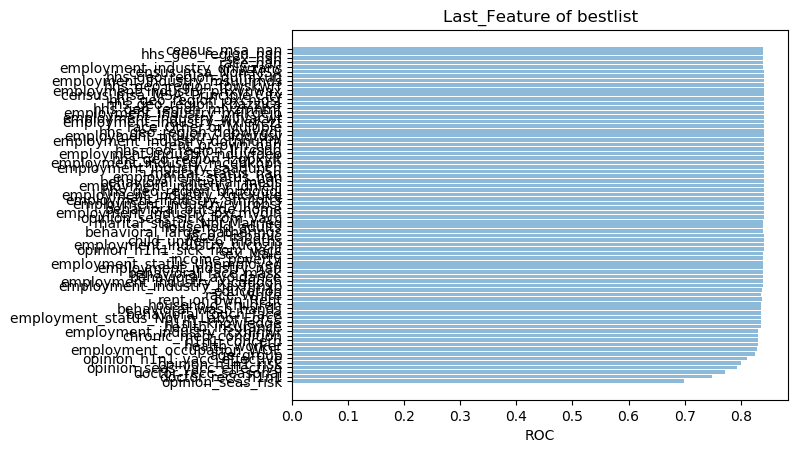

In [35]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ROC_Features_LogReg['last_feature']
y_pos = np.arange(len(ROC_Features_LogReg['last_feature']))
performance = ROC_Features_LogReg['ROC']

plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('ROC')
plt.title('Last_Feature of bestlist')

plt.show()

In [27]:
raw_df_bestfeatures = raw_df_processed[bestfeatures_list[:54]]
test_df_bestfeatures = test_df_processed[bestfeatures_list[:54]]
    
logisticRegr = MultiOutputClassifier(LogisticRegression(penalty="l2", C=1))

start = time.time()
logisticRegr.fit(raw_df_bestfeatures, labels_df)
test_probability = logisticRegr.predict_proba(test_df_bestfeatures)
end = time.time()


In [29]:
y_preds = pd.DataFrame(
{
        "h1n1_vaccine": test_probability[0][:, 1],
        "seasonal_vaccine": test_probability[1][:, 1],
    },
    index = test_df_bestfeatures.index
    )

In [30]:
submission_df = pd.read_csv(data_path_raw / "submission_format.csv", 
                            index_col="respondent_id")

In [31]:
np.testing.assert_array_equal(test_df_bestfeatures.index.values, 
                              submission_df.index.values)





In [33]:
# Save predictions to submission data frame
submission_df["h1n1_vaccine"] = y_preds["h1n1_vaccine"]
submission_df["seasonal_vaccine"] = y_preds["seasonal_vaccine"]

In [34]:
#CHANGE PATH 

output_path = Path.cwd().parent.parent / "models" / "submissions"


submission_df.to_csv(output_path /'submission_logreg_JFR_200729_ordinal_nominal_meanImpute_BestFeaturesIterated.csv', index=True)

